In [1]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import  datasets

# Change path for different computer

rookieTE2018_path = r'C:\Users\Jeremy\Desktop\RookieTE2018.csv'
rookieTEPrev_path = r'C:\Users\Jeremy\Desktop\RookieTE08-17.csv'
projTE_path = r'C:\Users\Jeremy\Desktop\TE_Projected.csv'
trainingTE_path = r'C:\Users\Jeremy\Desktop\TE_Aggregate.csv'
TE2018_path = r'C:\Users\Jeremy\Desktop\TE2018.csv'
dfRookieTE2018 = pd.read_csv(rookieTE2018_path)
dfRookieTEPrev = pd.read_csv(rookieTEPrev_path)
dfRookieTEPrevGraph = pd.read_csv(rookieTEPrev_path)
dfProjectedTE = pd.read_csv(projTE_path)
dfTrainingTE = pd.read_csv(trainingTE_path)
dfTE2018 = pd.read_csv(TE2018_path)
dfRookieTEPrev.columns

Index(['Name', 'GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump',
       'GP', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [3]:
dfRookieTE2018.head()

,Name,GP,REC,RecYDS,Y/R,RecTD,Height,Weight,40 Time,Vertical,Bench Press,Broad Jump
0,Mark Andrews,35,112,1765,15.8,22,77,256,4.67,31.0,17.0,113.0
1,Mike Gesicki,45,129,1481,11.5,15,78,246,4.54,NaN,22.0,129.0
2,Hayden Hurst,31,100,1281,12.8,3,75,250,4.67,31.5,NaN,120.0
3,Dallas Goedert,53,198,2988,15.1,21,77,256,NaN,NaN,23.0,NaN
4,Chris Herndon,34,86,1048,12.2,7,76,253,NaN,NaN,21.0,NaN


In [4]:
dfRookieTEPrev.columns

Index(['Name', 'GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump',
       'GP', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [5]:
dfTrainingTE.head()

,Name,G,Tgt,Rec,Yds,Y/R,TD,FMB,QBS RAT,OPPG,FantPt
0,Rob Gronkowski,15,131,82,1124,13.71,12,0,97.4,29.2,184
1,Antonio Gates,16,98,69,821,11.90,12,1,93.8,21.8,154
2,Jimmy Graham,16,125,85,889,10.46,10,2,97.0,25.1,145
3,Greg Olsen,16,123,84,1008,12.00,6,1,82.1,21.2,137
4,Martellus Bennett,16,128,90,916,10.18,6,0,88.6,19.9,132


In [6]:
dfTE2018.head()

,Name,AVG TGT,AVG REC,AVG YDS,AVG Y/R,AVG TD,AVG FMB,QBS RAT,Prev OPPG
0,Rob Gronkowski,112,73,1111,15.2,11.0,1,102.8,28.6
1,Travis Kelce,114,81,1049,13.0,7.0,2,NaN,25.9
2,Zach Ertz,109,75,848,11.3,5.0,1,101.9,28.6
3,Jimmy Graham,112,72,883,12.3,9.0,1,97.2,20.0
4,Greg Olsen,100,61,722,11.8,5.0,1,80.7,22.7


In [7]:
# Deal with empty spaces

dfRookieTE2018 = dfRookieTE2018.fillna(0)
dfRookieTEPrev = dfRookieTEPrev.fillna(0)
dfTrainingTE = dfTrainingTE.fillna(0)
dfTE2018 = dfTE2018.fillna(0)
dfRookieTEPrevGraph = dfRookieTEPrevGraph.dropna()
dfTE2018.head()

,Name,AVG TGT,AVG REC,AVG YDS,AVG Y/R,AVG TD,AVG FMB,QBS RAT,Prev OPPG
0,Rob Gronkowski,112,73,1111,15.2,11.0,1,102.8,28.6
1,Travis Kelce,114,81,1049,13.0,7.0,2,0.0,25.9
2,Zach Ertz,109,75,848,11.3,5.0,1,101.9,28.6
3,Jimmy Graham,112,72,883,12.3,9.0,1,97.2,20.0
4,Greg Olsen,100,61,722,11.8,5.0,1,80.7,22.7


In [8]:
# Train and test set construction for TE veterans

train, test = train_test_split(dfTrainingTE, test_size=0.2, random_state=45)
 
xtrain = train[['Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'FMB',
       'QBS RAT', 'OPPG']]
ytrain = train[['FantPt']]
 
xtest = test[['Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'FMB',
       'QBS RAT', 'OPPG']]
ytest = test[['FantPt']]

In [9]:
# Train and test set construction for TE rookies

train2, test2 = train_test_split(dfRookieTEPrev, test_size=0.2, random_state=45)
 
xtrain2 = train2[['GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytrain2 = train2[['FantPt']]
 
xtest2 = test2[['GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytest2 = test2[['FantPt']]

In [10]:
#Linear Regression for veterans

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

      FantPt
5   3.261850
25  1.736638
55  1.203220
37 -1.107759
51 -4.023623
48 -0.131259
45 -0.208023
19  0.033065
41  3.267862
18 -4.560617
52  0.819017
29 -0.636825
Coefficients: 
 [[ 0.03870421  0.0554994   0.08922063  0.8027015   5.84628881 -1.63862323
   0.01004351  0.01722671]]
Mean squared error: 5.428
Variance score: 0.990


In [11]:
#Linear Regression for rookies

linReg2 = linear_model.LinearRegression()
linReg2.fit(xtrain2, ytrain2)

y_predLin2 = linReg2.predict(xtest2)

print(y_predLin2 - ytest2)

print('Coefficients: \n', linReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predLin2))
print('Variance score: %.3f' % r2_score(ytest2, y_predLin2))

       FantPt
5  -86.931290
13  37.798028
7  -24.515348
0  -23.397185
36  44.804570
19  42.976870
9  -53.261733
18 -50.719795
Coefficients: 
 [[-2.26600925e-01  4.04423444e-01  1.01358851e-02  2.44618789e+00
  -2.00298703e+00 -1.21766180e+01  1.26610940e+00  3.76473180e+00
   5.58085983e-01 -2.22475064e+00 -3.50789175e-02]]
Mean squared error: 2424.743
Variance score: -0.845


In [12]:
# Ridge Regression for veterans

ridgeReg = linear_model.Ridge(alpha = 50)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

      FantPt
5   1.363465
25  2.194034
55  1.065305
37 -1.204823
51 -1.662133
48 -0.768631
45  0.191885
19 -5.831949
41  2.763684
18 -5.289388
52 -1.287431
29  0.310939
Coefficients: 
 [[ 0.10971722 -0.19342645  0.10313206 -0.07152363  4.99558557 -0.73263805
   0.11645969 -0.00988706]]
Mean squared error: 7.003
Variance score: 0.988


In [13]:
# Ridge Regression for rookies

ridgeReg2 = linear_model.Ridge(alpha = 50)

ridgeReg2.fit(xtrain2, ytrain2)

y_predRidge2 = ridgeReg2.predict(xtest2)

print(y_predRidge2 - ytest2)

print('Coefficients: \n', ridgeReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_predRidge2))

       FantPt
5  -82.300521
13  32.675449
7  -37.378584
0  -26.717316
36  23.609343
19  33.797781
9  -58.739952
18 -39.012356
Coefficients: 
 [[-0.23953735  0.05937268  0.02152236  1.04602361 -1.2164835  -2.73569178
   0.10863118  1.61395439  0.56135651 -1.0066214  -0.18695918]]
Mean squared error: 2078.009
Variance score: -0.582


In [14]:
# Bayesian Ridge for veterans

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [ 0.03995526  0.00890946  0.09315785  0.53298593  5.81482445 -1.57749604
  0.01408519  0.01327589]
Mean squared error: 5.198
Variance score: 0.991


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Bayesian Ridge for rookies

bayesianRidge2 = linear_model.BayesianRidge()

bayesianRidge2.fit(xtrain2, ytrain2)

y_pred_bayesianRidge2 = bayesianRidge2.predict(xtest2)

print('Coefficients: \n', bayesianRidge2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_pred_bayesianRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_pred_bayesianRidge2))

Coefficients: 
 [ 7.21090545e-06  3.43696010e-04  6.39181403e-03  3.65559998e-05
 -1.25617591e-05 -2.69270249e-05 -1.84283767e-04  1.92350288e-05
 -9.56994690e-06 -2.20224693e-04 -1.20718813e-03]
Mean squared error: 1605.906
Variance score: -0.222


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Support Vector Regression for veterans

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_supp = svr_rbf.predict(xtest)

print(y_supp - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_supp))
print('Variance score: %.3f' % r2_score(ytest, y_supp))

5    -20.755956
25     3.133989
55    11.289465
37   -20.218295
51     1.206106
48   -11.934974
45    20.274576
19   -39.872624
41     7.891621
18   -20.856708
52    -3.632780
29    27.253070
Name: FantPt, dtype: float64
Mean squared error: 364.571
Variance score: 0.354


In [17]:
# Support Vector Regression for rookies

svr_rbf2 = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf2.fit(xtrain2, ytrain2.values.ravel())

y_supp2 = svr_rbf2.predict(xtest2)

print(y_supp2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_supp2))
print('Variance score: %.3f' % r2_score(ytest2, y_supp2))

5    -72.128893
13    43.796778
7    -30.989503
0    -26.681436
36    15.694348
19    47.195076
9    -53.396508
18   -32.949784
Name: FantPt, dtype: float64
Mean squared error: 1900.443
Variance score: -0.446


In [18]:
# Random Forest Regression for veterans

randomForest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest.fit(xtrain, ytrain.values.ravel())

y_rand = randomForest.predict(xtest)
print(y_rand - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rand))
print('Variance score: %.3f' % r2_score(ytest, y_rand))

5    -10.58
25     3.86
55     5.38
37    -1.62
51     2.18
48     4.11
45    10.77
19   -27.80
41     2.67
18   -11.38
52     6.62
29     3.99
Name: FantPt, dtype: float64
Mean squared error: 105.438
Variance score: 0.813


In [19]:
# Random Forest Regression for rookies

randomForest2 = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest2.fit(xtrain2, ytrain2.values.ravel())

y_rand2 = randomForest2.predict(xtest2)
print(y_rand2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_rand2))
print('Variance score: %.3f' % r2_score(ytest2, y_rand2))

5    -81.76
13    40.81
7    -19.17
0    -30.27
36    28.92
19    36.63
9    -39.79
18   -18.44
Name: FantPt, dtype: float64
Mean squared error: 1716.915
Variance score: -0.307


In [20]:
# Gradient Boosting Regression for veterans

gradBoost = GradientBoostingRegressor()
gradBoost.fit(xtrain, ytrain.values.ravel())

y_grad = gradBoost.predict(xtest)
print(y_grad - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_grad))
print('Variance score: %.3f' % r2_score(ytest, y_grad))

5    -10.212127
25     0.525426
55     2.242197
37     1.861406
51     3.505663
48     2.161853
45     7.399775
19   -21.768194
41    -0.157604
18   -12.046848
52     8.280977
29     1.399070
Name: FantPt, dtype: float64
Mean squared error: 72.859
Variance score: 0.871


In [21]:
# Gradient Boosting Regression for rookies

gradBoost2 = GradientBoostingRegressor()
gradBoost2.fit(xtrain2, ytrain2.values.ravel())

y_grad2 = gradBoost2.predict(xtest2)
print(y_grad2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_grad2))
print('Variance score: %.3f' % r2_score(ytest2, y_grad2))

5    -94.045828
13    31.117115
7    -11.343337
0    -33.784391
36    34.038727
19    33.454899
9    -32.010120
18   -17.171846
Name: FantPt, dtype: float64
Mean squared error: 1835.042
Variance score: -0.397


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


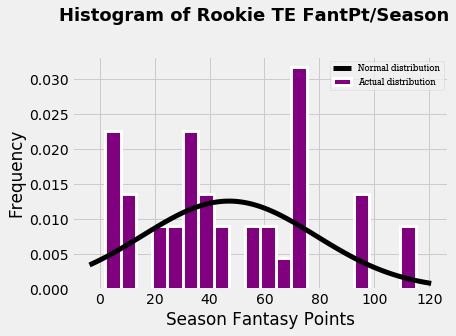

In [22]:
# Histogram graph of rookie TE fantasy points scored in a season

plt.style.use('fivethirtyeight')
rookiefantpthist, ax = plt.subplots()

ax.hist(dfRookieTEPrev['FantPt'], bins = 20, color = 'purple',edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
rookiefantpthist.suptitle("Histogram of Rookie TE FantPt/Season", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Season Fantasy Points")
ax.set_ylabel("Frequency")

overall_mean = dfRookieTEPrev['FantPt'].mean()
overall_std = dfRookieTEPrev['FantPt'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='black', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rookiefantpthist.savefig('rookiete-fantpt-history.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -2.7510688928014897 , intercept = 61.469461587573285 , r_value = -0.009491363745503065 , p_value = 0.9610266948599421 , std_err = 55.77908730646388


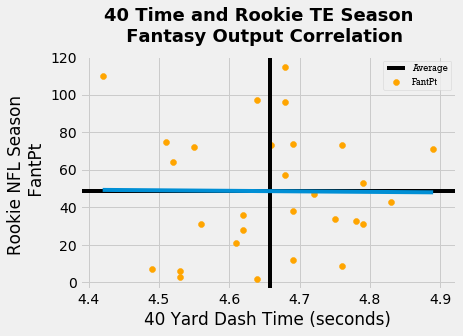

In [23]:
# Scatter plot of correlation between 40 Time and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookiete40, ax = plt.subplots()

ax.scatter(dfRookieTEPrevGraph['40 Time'], dfRookieTEPrevGraph['FantPt'], color = 'orange')
ax.axvline(x = np.mean(dfRookieTEPrevGraph['40 Time']), color = 'black')
ax.axhline(y = np.mean(dfRookieTEPrevGraph['FantPt']), label = "Average", color = 'black')
rookiete40.suptitle("40 Time and Rookie TE Season \n Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("40 Yard Dash Time (seconds)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieTEPrevGraph['40 Time']), np.poly1d(np.polyfit(dfRookieTEPrevGraph['40 Time'], dfRookieTEPrevGraph['FantPt'], 1))(np.unique(dfRookieTEPrevGraph['40 Time'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieTEPrevGraph['40 Time'], dfRookieTEPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiete40.savefig('college-nfl-40TE.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -0.3031289564116479 , intercept = 55.39717851329355 , r_value = -0.03420415025470933 , p_value = 0.8601808174469812 , std_err = 1.7045609787438871


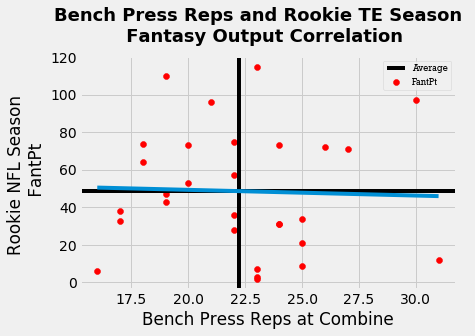

In [24]:
# Scatter plot of correlation between Bench Press and rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookietebp, ax = plt.subplots()

ax.scatter(dfRookieTEPrevGraph['Bench Press'], dfRookieTEPrevGraph['FantPt'], color = 'red')
ax.axvline(x = np.mean(dfRookieTEPrevGraph['Bench Press']), color = 'black')
ax.axhline(y = np.mean(dfRookieTEPrevGraph['FantPt']), label = "Average", color = 'black')
rookietebp.suptitle("Bench Press Reps and Rookie TE Season \n Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Bench Press Reps at Combine")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieTEPrevGraph['Bench Press']), np.poly1d(np.polyfit(dfRookieTEPrevGraph['Bench Press'], dfRookieTEPrevGraph['FantPt'], 1))(np.unique(dfRookieTEPrevGraph['Bench Press'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieTEPrevGraph['Bench Press'], dfRookieTEPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookietebp.savefig('college-nfl-BPTE.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -2.6337907375643215 , intercept = 249.6406518010291 , r_value = -0.09650362554130344 , p_value = 0.6184887945865416 , std_err = 5.2278605843561925


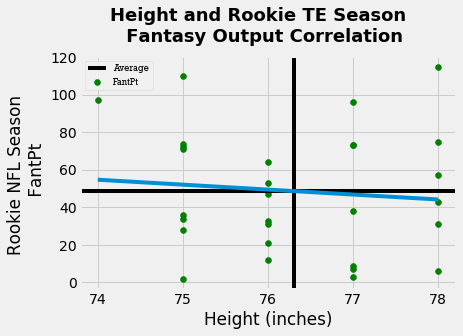

In [25]:
# Scatter plot of correlation between Height and rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookieteheight, ax = plt.subplots()

ax.scatter(dfRookieTEPrevGraph['Height'], dfRookieTEPrevGraph['FantPt'], color = 'green')
ax.axvline(x = np.mean(dfRookieTEPrevGraph['Height']), color = 'black')
ax.axhline(y = np.mean(dfRookieTEPrevGraph['FantPt']), label = "Average", color = 'black')
rookieteheight.suptitle("Height and Rookie TE Season \n Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieTEPrevGraph['Height']), np.poly1d(np.polyfit(dfRookieTEPrevGraph['Height'], dfRookieTEPrevGraph['FantPt'], 1))(np.unique(dfRookieTEPrevGraph['Height'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieTEPrevGraph['Height'], dfRookieTEPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookieteheight.savefig('college-nfl-heightTE.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 1.0454629951773853 , intercept = 15.679622485985192 , r_value = 0.33448143419719245 , p_value = 0.010280091706466559 , std_err = 0.3936216620601784


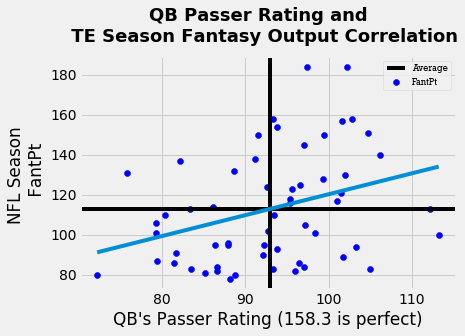

In [26]:
# Scatter plot of correlation between QB's Rating (performance) and season fantasy points

plt.style.use('fivethirtyeight')
 
teqbrat, ax = plt.subplots()

ax.scatter(dfTrainingTE['QBS RAT'], dfTrainingTE['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfTrainingTE['QBS RAT']), color = 'black')
ax.axhline(y = np.mean(dfTrainingTE['FantPt']), label = "Average", color = 'black')
teqbrat.suptitle("QB Passer Rating and \n TE Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("QB's Passer Rating (158.3 is perfect)")
ax.set_ylabel("NFL Season \n FantPt")
 
ax.plot(np.unique(dfTrainingTE['QBS RAT']), np.poly1d(np.polyfit(dfTrainingTE['QBS RAT'], dfTrainingTE['FantPt'], 1))(np.unique(dfTrainingTE['QBS RAT'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingTE['QBS RAT'], dfTrainingTE['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

teqbrat.savefig('QBRat-FantPtTE.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 1.9125934166440366 , intercept = 67.8347213627448 , r_value = 0.2672186110567964 , p_value = 0.04257932468563961 , std_err = 0.9216688874628356


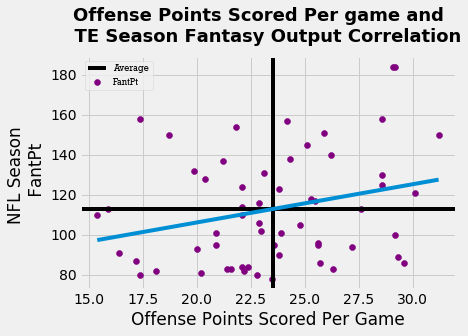

In [27]:
# Scatter plot of correlation between offense points scored per game and season fantasy points

plt.style.use('fivethirtyeight')
 
teppg, ax = plt.subplots()

ax.scatter(dfTrainingTE['OPPG'], dfTrainingTE['FantPt'], color = 'purple')
ax.axvline(x = np.mean(dfTrainingTE['OPPG']), color = 'black')
ax.axhline(y = np.mean(dfTrainingTE['FantPt']), label = "Average", color = 'black')
teppg.suptitle("Offense Points Scored Per game and \n  TE Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Offense Points Scored Per Game")
ax.set_ylabel("NFL Season \n FantPt")
 
ax.plot(np.unique(dfTrainingTE['OPPG']), np.poly1d(np.polyfit(dfTrainingTE['OPPG'], dfTrainingTE['FantPt'], 1))(np.unique(dfTrainingTE['OPPG'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingTE['OPPG'], dfTrainingTE['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

teppg.savefig('PPG-FantPtTE.png', dpi = 400, bbox_inches = 'tight')

In [28]:
# Linear Regression predictions 
# Rookies

rookieTE = dfRookieTE2018.loc[:, 'GP': 'Broad Jump']
linear_predsR = linReg2.predict(rookieTE)

veteranTE = dfTE2018.loc[:, 'AVG TGT': 'Prev OPPG']
linear_predsV = linReg.predict(veteranTE)

linear_preds = []
rows = 0
cols = 0

namesR = dfRookieTE2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for rookie TEs using Linear Regression: ")
for i in(namesR):
    linear_preds.append([i, linear_predsR[rows][cols]])
    print(i, linear_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
namesV = dfTE2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for veteran TEs using Linear Regression: ")
for i in(namesV):
    linear_preds.append([i, linear_predsV[rows][cols]])
    print(i, linear_predsV[rows][cols])  
    rows+=1
    
names = namesR.append(namesV)

2018 NFL season fantasy points prediction for rookie TEs using Linear Regression: 
Mark Andrews 42.446009001387324
Mike Gesicki -6.633900260190899
Hayden Hurst 118.92258380351177
Dallas Goedert 41.56790241446561
Chris Herndon 14.689941664508297

2018 NFL season fantasy points prediction for veteran TEs using Linear Regression: 
Rob Gronkowski 176.3038454231274
Travis Kelce 143.42486308951507
Zach Ertz 114.61639760960469
Jimmy Graham 141.6812366852759
Greg Olsen 102.33605931582146
Evan Engram 108.78057451647555
Kyle Rudolph 90.52409790800225
Delanie Walker 69.9953721852875
Trey Burton 64.25101228168604
Jordan Reed 119.29914557513841
David Njoku 65.17925454537948
Jack Doyle 48.921958411782356
George Kittle 65.81786175461922
Tyler Eifert 112.99486884544085
O.J. Howard 78.66514229774478
Jared Cook 77.20873737079285
Austin Seferian-Jenkins 67.14825826432153
Eric Ebron 91.56193401097282
Cameron Brate 76.10896194621705
Ben Watson 72.97253100017157
Austin Hooper 75.21461338944584
Charles Clay 

In [29]:
# Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
ridge_preds = []
ridge_predsR = ridgeReg2.predict(rookieTE)
print("2018 NFL season fantasy points prediction for rookie TEs using Ridge Regression: ")
for i in(namesR):
    ridge_preds.append([i, ridge_predsR[rows][cols]])
    print(i, ridge_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
ridge_predsV = ridgeReg.predict(veteranTE)
print("2018 NFL season fantasy points prediction for veteran TEs using Ridge Regression: ")
for i in(namesV):
    ridge_preds.append([i, ridge_predsV[rows][cols]])
    print(i, ridge_predsV[rows][cols])  
    rows+=1

2018 NFL season fantasy points prediction for rookie TEs using Ridge Regression: 
Mark Andrews 43.67294616174797
Mike Gesicki 10.733718247089996
Hayden Hurst 74.38104219288363
Dallas Goedert 61.420874791041825
Chris Herndon 35.98931136893438

2018 NFL season fantasy points prediction for veteran TEs using Ridge Regression: 
Rob Gronkowski 174.04431429546048
Travis Kelce 133.8191606037144
Zach Ertz 116.40519394431047
Jimmy Graham 140.37273372388506
Greg Olsen 102.68469657521621
Evan Engram 107.83576671029884
Kyle Rudolph 89.99506253080442
Delanie Walker 71.19724306341985
Trey Burton 63.668475578784935
Jordan Reed 120.61791660598439
David Njoku 66.03859162887262
Jack Doyle 41.901572277949064
George Kittle 68.31497563234349
Tyler Eifert 109.57918164914332
O.J. Howard 77.39765448230894
Jared Cook 79.34035112433712
Austin Seferian-Jenkins 68.64165657499757
Eric Ebron 83.0720461697142
Cameron Brate 76.56530737559568
Ben Watson 75.94364367002566
Austin Hooper 75.36076551092562
Charles Clay 64

In [30]:
# Bayesian Ridge Regression predictions
# Rookies

rows = 0
cols = 0
bayes_preds = []
bayes_predsR = bayesianRidge2.predict(rookieTE)
print("2018 NFL season fantasy points prediction for rookie TEs using Bayesian Ridge Regression: ")
for i in(namesR):
    bayes_preds.append([i, bayes_predsR[rows]])
    print(i, bayes_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
bayes_predsV = bayesianRidge.predict(veteranTE)
print("2018 NFL season fantasy points prediction for veteran TEs using Bayesian Ridge Regression: ")
for i in(namesV):
    bayes_preds.append([i, bayes_predsV[rows]])
    print(i, bayes_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie TEs using Bayesian Ridge Regression: 
Mark Andrews 46.61558312974548
Mike Gesicki 44.78784757410854
Hayden Hurst 43.51436922558985
Dallas Goedert 54.59774406008869
Chris Herndon 42.160083970072634

2018 NFL season fantasy points prediction for veteran TEs using Bayesian Ridge Regression: 
Rob Gronkowski 176.25955475800052
Travis Kelce 143.14178898583296
Zach Ertz 114.67672391460636
Jimmy Graham 141.64229687669547
Greg Olsen 102.34406380703315
Evan Engram 108.73467899038894
Kyle Rudolph 90.57259668319874
Delanie Walker 70.03690864871636
Trey Burton 64.346249308499
Jordan Reed 119.33706069467841
David Njoku 65.12119691003994
Jack Doyle 48.98817334415274
George Kittle 65.85306161313599
Tyler Eifert 112.82561389578383
O.J. Howard 77.93543203769536
Jared Cook 77.18563186220277
Austin Seferian-Jenkins 67.33649303533232
Eric Ebron 91.27906264942152
Cameron Brate 76.10750220990627
Ben Watson 73.12466178089926
Austin Hooper 75.31671783714384


In [31]:
# Support Vector Regression predictions 
# Rookies

rows = 0
svr_preds = []
svr_predsR = svr_rbf2.predict(rookieTE)
print("2018 NFL season fantasy points prediction for rookie TEs using Support Vector Regression: ")
for i in(namesR):
    svr_preds.append([i, svr_predsR[rows]])
    print(i, svr_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
svr_predsV = svr_rbf.predict(veteranTE)
print("2018 NFL season fantasy points prediction for veteran TEs using Support Vector Regression: ")
for i in(namesV):
    svr_preds.append([i, svr_predsV[rows]])
    print(i, svr_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie TEs using Support Vector Regression: 
Mark Andrews 39.64836271057927
Mike Gesicki 40.51159219990421
Hayden Hurst 43.69434688796178
Dallas Goedert 43.69434786655048
Chris Herndon 49.48613730296312

2018 NFL season fantasy points prediction for veteran TEs using Support Vector Regression: 
Rob Gronkowski 153.05848025027043
Travis Kelce 117.54842056025373
Zach Ertz 107.4518781319446
Jimmy Graham 129.8773436139905
Greg Olsen 97.825057153394
Evan Engram 102.07447275566159
Kyle Rudolph 94.52495467258204
Delanie Walker 85.69238352892215
Trey Burton 93.85506548108538
Jordan Reed 114.31445133992426
David Njoku 96.0856049325762
Jack Doyle 117.54372128940349
George Kittle 94.08053703489324
Tyler Eifert 108.50218281706964
O.J. Howard 107.4704482614778
Jared Cook 91.79230584095068
Austin Seferian-Jenkins 86.9735852260514
Eric Ebron 117.5238644247048
Cameron Brate 89.70844535419175
Ben Watson 110.4790238037125
Austin Hooper 89.57959434178578
Charl

In [32]:
# Random Forest Regression predictions for TE
# Rookies

rows = 0
rf_preds = []
rf_predsR = randomForest2.predict(rookieTE)
print("2018 NFL season fantasy points prediction for rookie TEs using Random Forest Regression: ")
for i in(namesR):
    rf_preds.append([i, rf_predsR[rows]])
    print(i, rf_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
rf_predsV = randomForest.predict(veteranTE)
print("2018 NFL season fantasy points prediction for veteran TEs using Random Forest Regression: ")
for i in(namesV):
    rf_preds.append([i, rf_predsV[rows]])
    print(i, rf_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie TEs using Random Forest Regression: 
Mark Andrews 63.21
Mike Gesicki 48.3
Hayden Hurst 46.25
Dallas Goedert 61.33
Chris Herndon 57.26

2018 NFL season fantasy points prediction for veteran TEs using Random Forest Regression: 
Rob Gronkowski 162.4
Travis Kelce 136.87
Zach Ertz 112.83
Jimmy Graham 144.31
Greg Olsen 93.63
Evan Engram 102.84
Kyle Rudolph 95.27
Delanie Walker 86.45
Trey Burton 87.32
Jordan Reed 119.14
David Njoku 84.65
Jack Doyle 88.88
George Kittle 82.21
Tyler Eifert 101.64
O.J. Howard 90.45
Jared Cook 86.68
Austin Seferian-Jenkins 83.59
Eric Ebron 92.9
Cameron Brate 84.74
Ben Watson 87.17
Austin Hooper 82.49
Charles Clay 87.93
Ricky Seals-Jones 87.04
Vance Mcdonald 87.14


In [33]:
# Gradient Boosting Regression predictions
# Rookies

rows = 0
gb_preds = []
gb_predsR = gradBoost2.predict(rookieTE)
print("2018 NFL season fantasy points prediction for rookie TEs using Gradient Boosting Regression: ")
for i in(namesR):
    gb_preds.append([i, gb_predsR[rows]])
    print(i, gb_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
gb_predsV = gradBoost.predict(veteranTE)
print("2018 NFL season fantasy points prediction for veteran TEs using Gradient Boosting Regression: ")
for i in(namesV):
    gb_preds.append([i, gb_predsV[rows]])
    print(i, gb_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie TEs using Gradient Boosting Regression: 
Mark Andrews 49.90018745480775
Mike Gesicki 55.352476724107404
Hayden Hurst 39.09997583577689
Dallas Goedert 68.54841543831014
Chris Herndon 59.994636447652766

2018 NFL season fantasy points prediction for veteran TEs using Gradient Boosting Regression: 
Rob Gronkowski 164.49094431564754
Travis Kelce 142.01206832326156
Zach Ertz 111.73989376201219
Jimmy Graham 149.29749728238443
Greg Olsen 92.26594904012576
Evan Engram 108.64503724945327
Kyle Rudolph 96.07486555834303
Delanie Walker 82.95501525488777
Trey Burton 81.65672513834159
Jordan Reed 119.4916784513013
David Njoku 84.43037693472745
Jack Doyle 80.01531939419523
George Kittle 81.05814803037813
Tyler Eifert 105.6799356030289
O.J. Howard 91.56028834280679
Jared Cook 81.74462894884205
Austin Seferian-Jenkins 78.0783969516715
Eric Ebron 91.87979282911033
Cameron Brate 83.69937861292759
Ben Watson 85.08014509358556
Austin Hooper 81.9418337160

In [34]:
#Convert to dataframes 

dflinear = pd.DataFrame(linear_preds, columns = ['Name', 'FantPtLinear'])
dfridge = pd.DataFrame(ridge_preds, columns = ['Name', 'FantPtRidge'])
dfbayes = pd.DataFrame(bayes_preds, columns = ['Name', 'FantPtBayes'])
dfrand = pd.DataFrame(rf_preds, columns = ['Name', 'FantPtRF'])
dfgrad = pd.DataFrame(gb_preds, columns = ['Name', 'FantPtGB'])
dfsvr = pd.DataFrame(svr_preds, columns = ['Name', 'FantPtSVR'])

In [35]:
# Merge with actual data for validation

dflinear = dflinear.merge(dfProjectedTE)
dfridge = dfridge.merge(dfProjectedTE)
dfbayes = dfbayes.merge(dfProjectedTE)
dfrand = dfrand.merge(dfProjectedTE)
dfgrad = dfgrad.merge(dfProjectedTE)
dfsvr = dfsvr.merge(dfProjectedTE)
dflinear.head()

,Name,FantPtLinear,ESPN,Projected
0,Mark Andrews,42.446009,34.4,62.0
1,Mike Gesicki,-6.633900,72.3,16.7
2,Hayden Hurst,118.922584,51.7,17.5
3,Dallas Goedert,41.567902,40.0,62.2
4,Chris Herndon,14.689942,36.2,68.6


In [36]:
# RMSE and MSE validation for ESPN's Predictions

mse = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.ESPN
    temp = temp * temp
    mse += temp
mse = mse/dflinear.shape[0]
rmse = math.sqrt(mse)

print("ESPN Mean Squared Error: " + str(mse))
print("ESPN Root Mean Squared Error: " + str(rmse))

ESPN Mean Squared Error: 2581.8775
ESPN Root Mean Squared Error: 50.8121786582705


In [37]:
# RMSE and MSE validation for Linear Regression predictions

mselinear = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.FantPtLinear
    temp = temp * temp
    mselinear += temp
mselinear = mselinear/dflinear.shape[0]
rmselinear = math.sqrt(mselinear)

print("Linear Regression Mean Squared Error: " + str(mselinear))
print("Linear Regression Root Mean Squared Error: " + str(rmselinear))

Linear Regression Mean Squared Error: 2863.6237639977217
Linear Regression Root Mean Squared Error: 53.51283737569633


In [38]:
# RMSE and MSE validation for Ridge Regression predictions

mseridge = 0
for row in dfridge.itertuples():
    temp = row.Projected-row.FantPtRidge
    temp = temp * temp
    mseridge += temp
mseridge = mseridge/dfridge.shape[0]
rmseridge = math.sqrt(mseridge)

print("Ridge Regression Mean Squared Error: " + str(mseridge))
print("Ridge Regression Root Mean Squared Error: " + str(rmseridge))

Ridge Regression Mean Squared Error: 2532.90037448157
Ridge Regression Root Mean Squared Error: 50.32792837462684


In [39]:
# RMSE and MSE validation for Bayesian Ridge Regression predictions

msebayes = 0
for row in dfbayes.itertuples():
    temp = row.Projected-row.FantPtBayes
    temp = temp * temp
    msebayes += temp
msebayes = msebayes/dfbayes.shape[0]
rmsebayes = math.sqrt(msebayes)

print("Bayesian Ridge Regression Mean Squared Error: " + str(msebayes))
print("Bayesian Ridge Regression Root Mean Squared Error: " + str(rmsebayes))

Bayesian Ridge Regression Mean Squared Error: 2433.9932872831137
Bayesian Ridge Regression Root Mean Squared Error: 49.335517502942174


In [40]:
# RMSE and MSE validation for Support Vector Regression predictions

msesvr = 0
for row in dfsvr.itertuples():
    temp = row.Projected-row.FantPtSVR
    temp = temp * temp
    msesvr += temp
msesvr = msesvr/dfsvr.shape[0]
rmsesvr = math.sqrt(msesvr)

print("Support Vector Regression Mean Squared Error: " + str(msesvr))
print("Support Vector Regression Root Mean Squared Error: " + str(rmsesvr))

Support Vector Regression Mean Squared Error: 2920.6197525650837
Support Vector Regression Root Mean Squared Error: 54.04275855806293


In [41]:
# RMSE and MSE validation for Random Forest Regression predictions

mserf = 0
for row in dfrand.itertuples():
    temp = row.Projected-row.FantPtRF
    temp = temp * temp
    mserf += temp
mserf = mserf/dfrand.shape[0]
rmserf = math.sqrt(mserf)

print("Random Forest Regression Mean Squared Error: " + str(mserf))
print("Random Forest Regression Root Mean Squared Error: " + str(rmserf))

Random Forest Regression Mean Squared Error: 2486.7474142857145
Random Forest Regression Root Mean Squared Error: 49.86729804476792


In [42]:
# RMSE and MSE validation for Gradient Boosting Regression predictions

msegb = 0
for row in dfgrad.itertuples():
    temp = row.Projected-row.FantPtGB
    temp = temp * temp
    msegb += temp
msegb = msegb/dfgrad.shape[0]
rmsegb = math.sqrt(msegb)

print("Gradient Boosting Regression Mean Squared Error: " + str(msegb))
print("Gradient Boosting Regression Root Mean Squared Error: " + str(rmsegb))

Gradient Boosting Regression Mean Squared Error: 2463.549357611279
Gradient Boosting Regression Root Mean Squared Error: 49.634155151581645


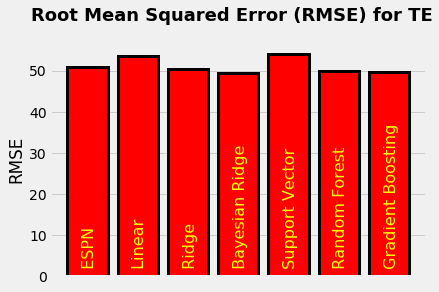

In [43]:
# Root Mean Squared Error Graph

rmsePlot, ax = plt.subplots()

rmseScores = [rmse, rmselinear, rmseridge, rmsebayes, rmsesvr, rmserf, rmsegb]
x_pos = np.arange(len(rmseScores))

ax.bar(x_pos, rmseScores, edgecolor = 'black', color = 'red', linewidth = 3)

rmseNames = [" ESPN", " Linear", " Ridge", " Bayesian Ridge", " Support Vector", " Random Forest", " Gradient Boosting"]

labels = [i for i in rmseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 16)

rmsePlot.suptitle("Root Mean Squared Error (RMSE) for TE", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("RMSE")

rmsePlot.savefig('rmseTE-plot.png', dpi = 400, bbox_inches = 'tight')

[['Rob Gronkowski', 176.25955475800052], ['Travis Kelce', 143.14178898583296], ['Jimmy Graham', 141.64229687669547], ['Jordan Reed', 119.33706069467841], ['Zach Ertz', 114.67672391460636], ['Tyler Eifert', 112.82561389578383], ['Evan Engram', 108.73467899038894], ['Greg Olsen', 102.34406380703315], ['Eric Ebron', 91.27906264942152], ['Kyle Rudolph', 90.57259668319874]]


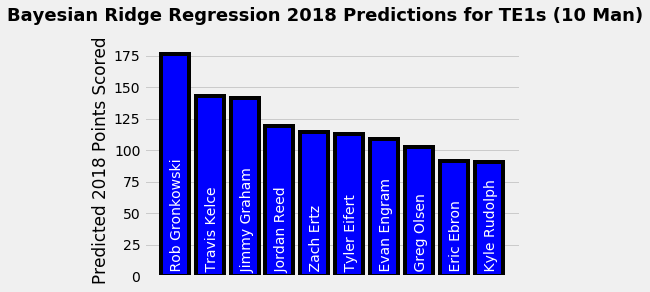

In [44]:
# Predictions for TE1s (TE#1 - TE#10) for using most accurate ML technique (Bayesian Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
bayespredictions, ax = plt.subplots()
bayesPlot = []

for i in range(len(bayes_preds)):
    bayesPlot.append(bayes_preds[i][1])
    
combinedBayes = [[i, j] for i, j in zip(names, bayesPlot)]
sortedBayes = sorted(combinedBayes, key = itemgetter(1), reverse = True)

TE1Bayes = []
TE1Bayes = sortedBayes[0:10]
print(TE1Bayes)

sortedBayesData = [row[1] for row in TE1Bayes]
x_pos = np.arange(len(sortedBayesData))

ax.bar(x_pos, sortedBayesData, color = 'blue' ,edgecolor = 'black', linewidth = 4)
labels = [' '+ row[0] for row in sortedBayes]
rects = ax.patches
test = 0
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

bayespredictions.suptitle("Bayesian Ridge Regression 2018 Predictions for TE1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

bayespredictions.savefig('bayesianridgepredictionsTE1.png', dpi = 400, bbox_inches = 'tight')

[['O.J. Howard', 77.93543203769536], ['Jared Cook', 77.18563186220277], ['Cameron Brate', 76.10750220990627], ['Vance Mcdonald', 75.43799190146785], ['Austin Hooper', 75.31671783714384], ['Ben Watson', 73.12466178089926], ['Charles Clay', 71.70828227918308], ['Delanie Walker', 70.03690864871636], ['Austin Seferian-Jenkins', 67.33649303533232], ['George Kittle', 65.85306161313599]]


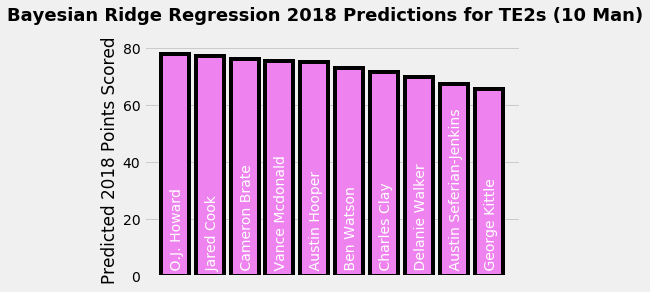

In [45]:
# Predictions for TE2s (TE #11 - TE#20) for using most accurate ML technique (Bayesian Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
bayespredictions, ax = plt.subplots()

TE2Bayes = []
TE2Bayes = sortedBayes[10:20]
print(TE2Bayes)

sortedBayesData = [row[1] for row in TE2Bayes]
x_pos = np.arange(len(sortedBayesData))

ax.bar(x_pos, sortedBayesData, color = 'violet' ,edgecolor = 'black', linewidth = 4)

labelsTE2 = labels[10:20]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsTE2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

bayespredictions.suptitle("Bayesian Ridge Regression 2018 Predictions for TE2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

bayespredictions.savefig('bayesianridgepredictionsTE2.png', dpi = 400, bbox_inches = 'tight')

Average Seasonal Fantasy Points for TE1s:
[['Rob Gronkowski', 167.75952317375106], ['Jimmy Graham', 141.19685136370524], ['Travis Kelce', 136.1360502604296], ['Jordan Reed', 118.70004211117111], ['Zach Ertz', 112.9533478937464], ['Tyler Eifert', 108.53696380174442], ['Evan Engram', 106.4850883703797], ['Greg Olsen', 98.51430431526508], ['Eric Ebron', 94.70278334732062], ['Kyle Rudolph', 92.82692955882175]]


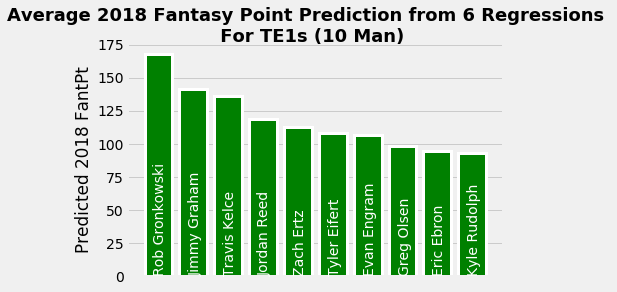

In [46]:
# Average Predictions plot for TE1 (TE#1 - TE#10) since predictions are similar in accuracy

avgPredictions, ax = plt.subplots()

averagePred = []
name = 0

for h, i ,j ,k , l, m, in zip(linear_preds, ridge_preds, bayes_preds, svr_preds, rf_preds, gb_preds):
    averagePred.append([linear_preds[name][0], (linear_preds[name][1] + ridge_preds[name][1] + bayes_preds[name][1] + svr_preds[name][1] + rf_preds[name][1] + gb_preds[name][1]) / 6])
    name += 1

sortedAvg = sorted(averagePred, key = itemgetter(1), reverse = True)
TE1Avg = []
TE1Avg = sortedAvg[0:10]
print("Average Seasonal Fantasy Points for TE1s:")
print(TE1Avg)

sortedAvgData = [row[1] for row in TE1Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'green', edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsK1 = labels[0:10]

rects = ax.patches
for rect, label in zip(rects, labelsK1):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For TE1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsTE1.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for TE2s:
[['Ben Watson', 84.12833422473243], ['Charles Clay', 82.67122757906411], ['Jared Cook', 82.32527585785424], ['Vance Mcdonald', 82.0361769242828], ['Cameron Brate', 81.15493258313973], ['Austin Hooper', 79.98392079922996], ['Delanie Walker', 77.7211537802056], ['David Njoku', 76.91750415859927], ['George Kittle', 76.22243067756169]]


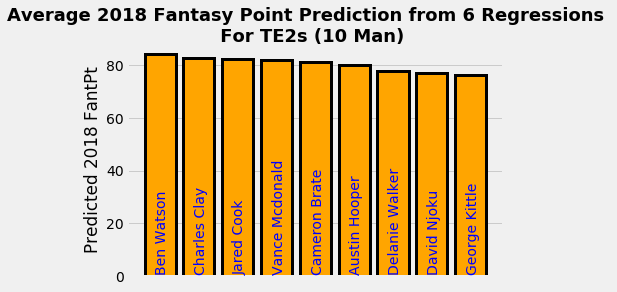

In [47]:
# Average Predictions plot for TE2 (TE#11 - TE#20) 

avgPredictions, ax = plt.subplots()

TE2Avg = []
TE2Avg = sortedAvg[11:20]
print("Average 2018 Season Projections for TE2s:")
print(TE2Avg)

sortedAvgData = [row[1] for row in TE2Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'orange', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsRB2 = labels[11:20]

rects = ax.patches
for rect, label in zip(rects, labelsRB2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For TE2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsTE2.png', dpi = 400, bbox_inches = 'tight')